In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv("Data/PreprocessedUnicorn.csv")

In [3]:
df.describe()

,Entry_Valuation ($B),Final_Valuation ($B),Number_of_investors,Year,Profit_Percentage,Profit
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.547549,3.398020,4.294118,2020.029412,1.493279,1.850471
std,1.138013,4.710657,1.148294,2.292717,4.353944,4.590741
min,1.000000,0.568000,2.000000,2011.000000,-0.432000,-0.432000
25%,1.000000,1.200000,4.000000,2019.000000,0.000000,0.000000
50%,1.200000,1.850000,4.000000,2021.000000,0.000000,0.000000
75%,1.582500,3.475000,5.000000,2021.000000,1.421429,2.000000
max,10.000000,37.600000,7.000000,2022.000000,36.600000,36.600000


In [4]:
df.head()

,Company,Sector,Entry_Valuation ($B),Final_Valuation ($B),Entry,Location,Select Investors,Main_Sector,Number_of_investors,Month,Year,Profit_Percentage,Profit
0,Inmobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Adtech,3,Sep,2011,0.000000,0.0
1,Flipkart,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",E-Commerce,5,Feb,2012,36.600000,36.6
2,Mu sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Saas,3,Feb,2013,0.500000,0.5
3,Snapdeal,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",E-Commerce,5,Oct,2014,0.333333,0.6
4,Paytm,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Fintech,4,Feb,2015,8.411765,14.3


## Data Understanding

| Column Name         | Description                                                                                                                              |
|:--------------------|:-----------------------------------------------------------------------------------------------------------------------------------------|
| Company             | The name of the Indian unicorn startup.                                                                                                  |
| Sector              | Categorizes each startup based on the industry or sector in which it operates.                                                          |
| Entry Valuation     | Denotes the valuation of the company at the time of entry into the unicorn club, measured in billions of dollars.                        |
| Valuation           | Reflects the current valuation of the company, also measured in billions of dollars.                                                     |
| Location            | Specifies the geographic location or city where the startup is headquartered.                                                           |
| Select Investors    | Lists the notable investors who have invested in the respective startup, including venture capitalists, private equity firms, and others. |
| Number of Investors | Indicates the count of investors who have invested in the startup.                                                                       |
| Year                | Represents the year in which the startup data is recorded.                                                                              |
| Month               | Represents the month in which the startup data is recorded.                                                                             |

Let's Start our analysis with sector bases

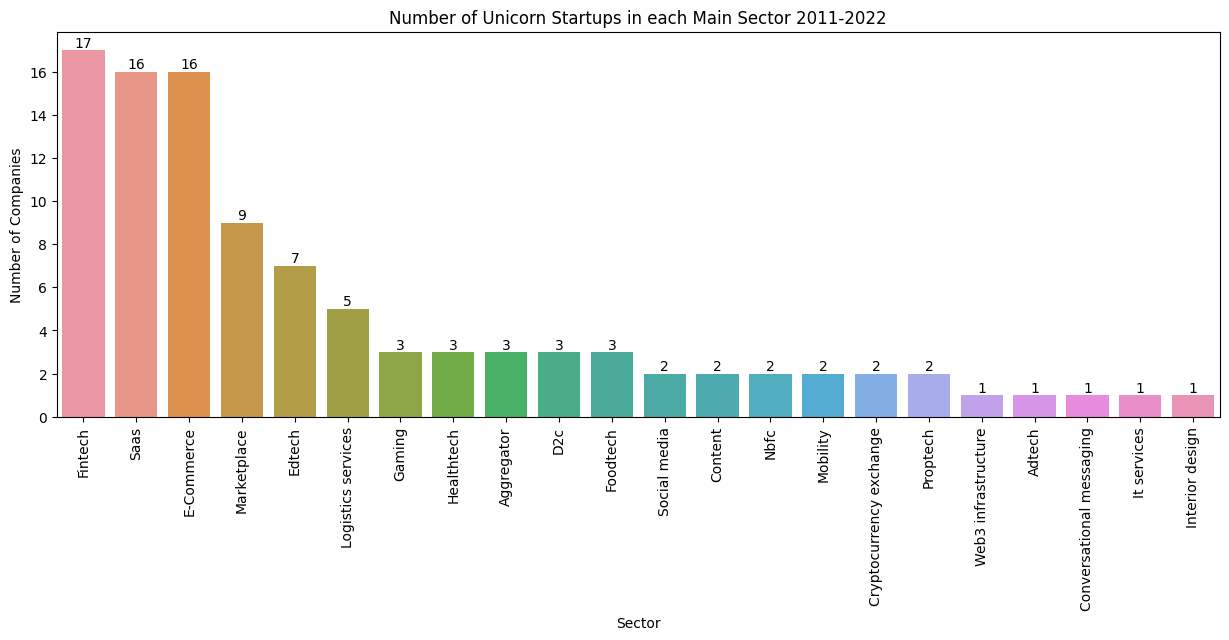

In [5]:
# Calculate the frequency of each Main_Sector
sector_counts = df['Main_Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=sector_counts.index, y=sector_counts.values)
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.title('Number of Unicorn Startups in each Main Sector 2011-2022')
plt.xticks(rotation=90)

# Add count labels to the bars
for i, count in enumerate(sector_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


### Insights:

After plotting the frequency of Main Sectors for unicorn startups, the following key insights can be observed:

1. Fintech emerges as the leading industry for unicorn startups, indicating a strong presence of innovative financial technology companies.
2. SaaS (Software as a Service) and E-Commerce sectors show significant activity and competition, both being prominent areas for unicorn startups.
3. Fintech, SaaS, and E-Commerce sectors collectively dominate the unicorn startup landscape, highlighting the potential for disruption and growth in these industries.
4. Other notable main sectors include Marketplace, Edtech (Education Technology), and Logistics Services, which also demonstrate a considerable number of unicorn startups.

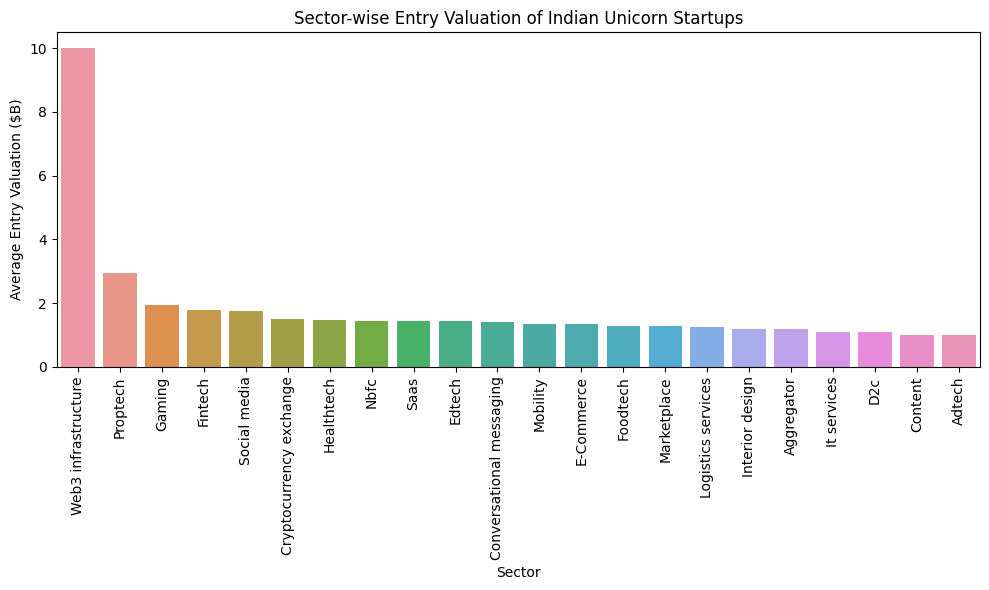

In [6]:
# Group the dataset by sector and calculate the average entry valuation
sector_avg_valuation = df.groupby("Main_Sector")["Entry_Valuation ($B)"].mean().sort_values(ascending=False)

# Plot the sector-wise entry valuation using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_avg_valuation.index, y=sector_avg_valuation.values)
plt.xlabel("Sector")
plt.ylabel("Average Entry Valuation ($B)")
plt.title("Sector-wise Entry Valuation of Indian Unicorn Startups")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights:
- The Web3 Infrastructure sector stands out with a significantly higher average entry valuation requirement of around 10 billion dollars. This indicates the substantial investment and growth potential in the Web3 space, which encompasses blockchain, cryptocurrency, and decentralized technologies.

- Other sectors, such as E-Commerce, Fintech, Healthtech, and Edtech, have relatively lower average entry valuations ranging from 1 to 2 billion dollars. This suggests that startups in these sectors can attract investments with a comparatively lower investment threshold.

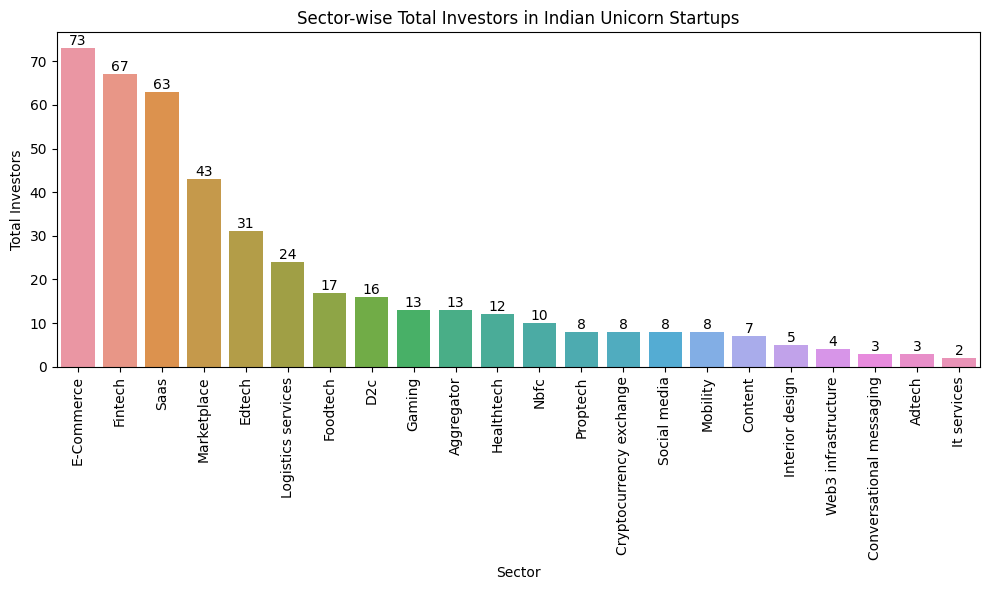

In [7]:
# Calculate the total number of investors for each sector
sector_total_investors = df.groupby('Main_Sector')['Number_of_investors'].sum()

# Sort the sectors based on the total number of investors
sorted_sectors = sector_total_investors.sort_values(ascending=False)

# Plot the sector-wise total investors using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_sectors.index, y=sorted_sectors.values)
plt.xlabel('Sector')
plt.ylabel('Total Investors')
plt.title('Sector-wise Total Investors in Indian Unicorn Startups')
plt.xticks(rotation=90)

# Add the count labels to the bars
for i, count in enumerate(sorted_sectors.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


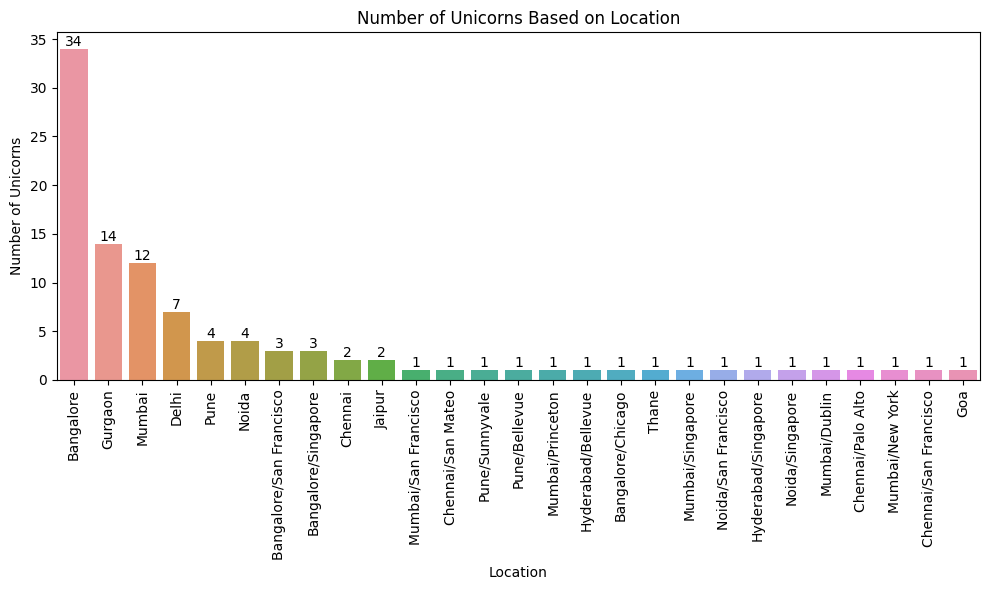

In [8]:
# Count the number of unicorns in each location
unicorn_counts = df['Location'].value_counts()

# Sort the locations based on unicorn count in descending order
sorted_locations = unicorn_counts.sort_values(ascending=False)

# Plot the number of unicorns based on location using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_locations.index, y=sorted_locations.values)
plt.xlabel('Location')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns Based on Location')
plt.xticks(rotation=90)

# Add numbers on top of the bars
for i, count in enumerate(sorted_locations.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Insights:
- Bangalore is the primary hub for startups and unicorn companies in India, with the highest concentration of unicorn startups.
- Gurgaon and Mumbai are also prominent locations for unicorn startups.
- Delhi, Pune, and Noida have a some notable presence in the unicorn startup landscape.
- Other locations have a relatively smaller number of unicorn startups compared to the top cities.

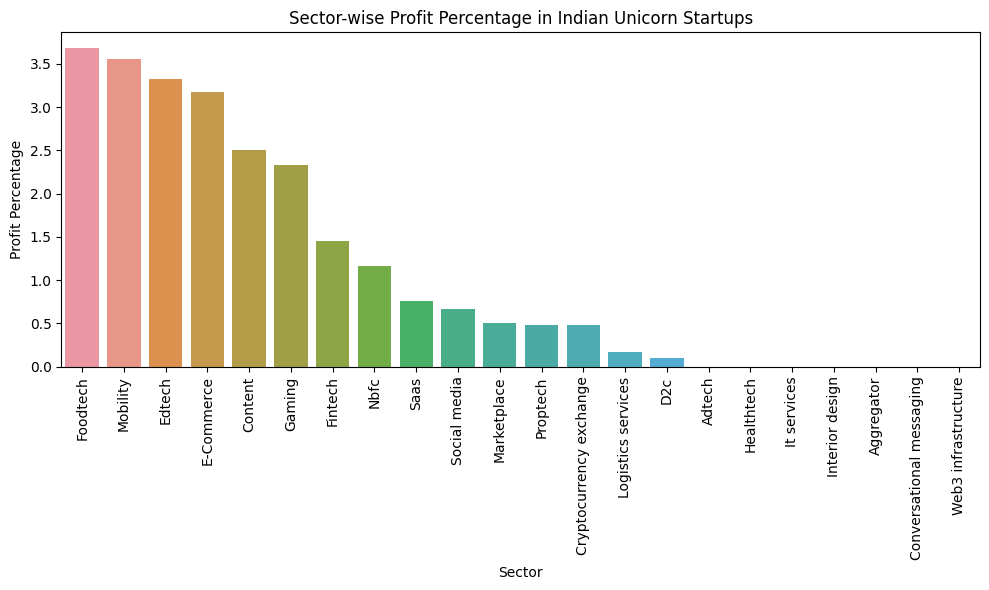

In [9]:
# Calculate the profit percentage for each startup
df['Profit_Percentage'] = (df['Final_Valuation ($B)'] - df['Entry_Valuation ($B)']) / df['Entry_Valuation ($B)']

# Group the startups by main sector and calculate the average profit percentage
sector_avg_profit = df.groupby('Main_Sector')['Profit_Percentage'].mean()

# Sort the sectors based on the average profit percentage
sorted_sectors = sector_avg_profit.sort_values(ascending=False)

# Plot the sector-wise profit percentage using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_sectors.index, y=sorted_sectors.values)
plt.xlabel('Sector')
plt.ylabel('Profit Percentage')
plt.title('Sector-wise Profit Percentage in Indian Unicorn Startups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights:
- The sectors that have shown the highest profit percentages based on the difference between entry and final valuations are Foodtech, Mobility, Edtech, and Content.
- Fintech and Gaming sectors have also demonstrated considerable profitability.
- However, other sectors in the dataset have not shown significant profit percentages compared to the top-performing sectors.

## Let's do analysis on Year wise:

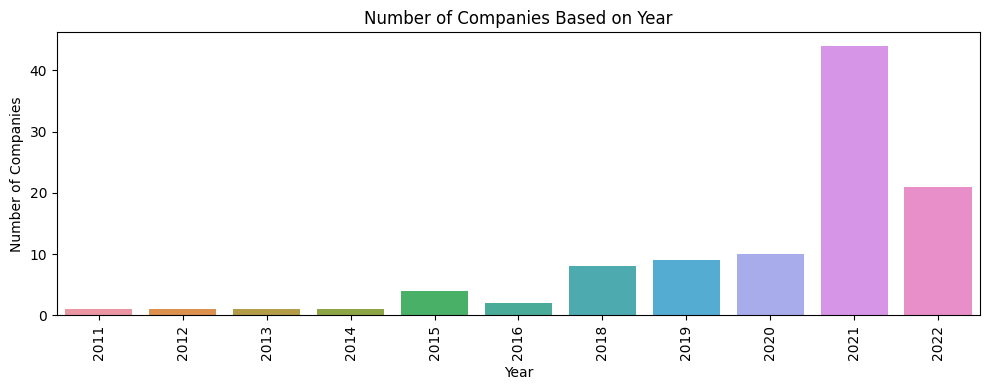

In [10]:
# Count the number of companies based on the year of entry
year_counts = df['Year'].value_counts()

# Sort the years in ascending order
sorted_years = year_counts.sort_index()

# Plot the number of companies based on the year of entry using a line plot
plt.figure(figsize=(10, 4))
sns.barplot(x=sorted_years.index, y=sorted_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Based on Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insights:
1. The year 2021 witnessed a remarkable surge in the establishment of unicorn startups, marking it as a pinnacle year for such ventures.
2. In the subsequent year, 2022, although the number of startups remained high, it experienced a slight decrease compared to the unprecedented growth observed in 2021.
3. Prior to 2021, the years 2018, 2019, and 2020 demonstrated a reasonably healthy environment for startup activities.
4. However, preceding the aforementioned years, no notable periods were recognized as particularly prosperous for startups.



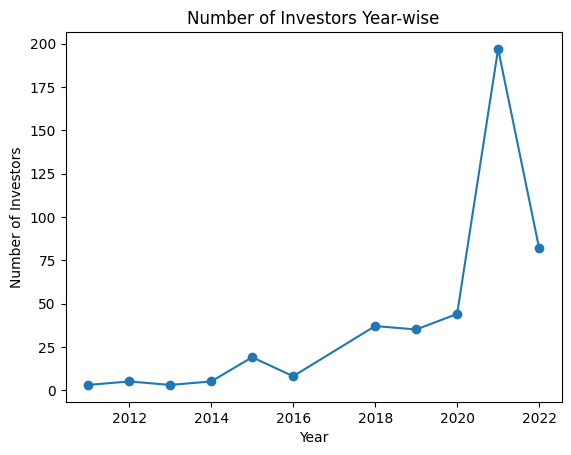

In [11]:
#Anaylse the number of investors year wise
# Grouping the data by year and calculating the total number of investors for each year
investors_by_year = df.groupby('Year')['Number_of_investors'].sum()

# Plotting a line graph to visualize the trend
plt.plot(investors_by_year.index, investors_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Investors')
plt.title('Number of Investors Year-wise')
plt.show()

## Insights:
- The number of investors experienced rapid growth in 2021, indicating a thriving investment landscape.
- However, there was a subsequent decline in 2022, suggesting a reduced number of companies seeking investment during that period.

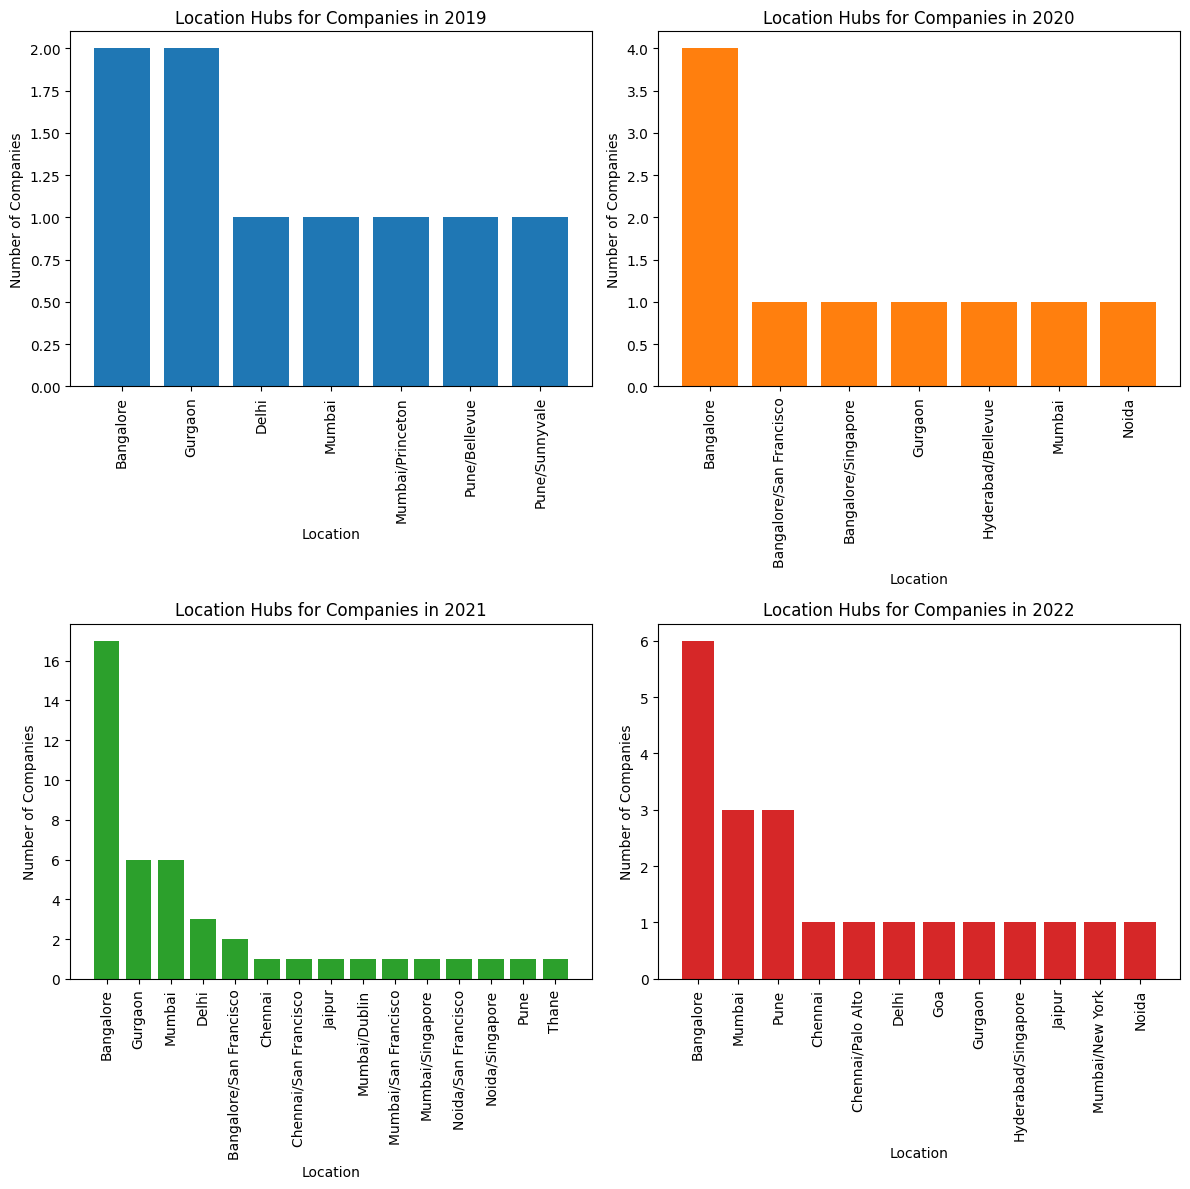

In [12]:
def plot_location_hubs(df, years):
    # Filter data for the specified years
    filtered_data = df[df['Year'].isin(years)]

    # Grouping the filtered data by year and location, and calculating the count of companies in each location
    location_hubs = filtered_data.groupby(['Year', 'Location'])['Company'].count().reset_index()

    # Sort the location hubs by the number of companies in each location for each year
    location_hubs_sorted = location_hubs.sort_values(['Year', 'Company'], ascending=[True, False])

    # Create subplots for each year
    num_rows = (len(years) + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6*num_rows))

    # Define color palette for each year using Seaborn
    colors = sns.color_palette('tab10', len(years))

    # Iterate over years and plot location hubs
    for i, year in enumerate(years):
        ax = axes[i // 2, i % 2]
        year_data = location_hubs_sorted[location_hubs_sorted['Year'] == year]
        ax.bar(year_data['Location'], year_data['Company'], color=colors[i])
        ax.set_xlabel('Location')
        ax.set_ylabel('Number of Companies')
        ax.set_title(f'Location Hubs for Companies in {year}')
        ax.tick_params(axis='x', rotation=90)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the subplots
    plt.show()

plot_location_hubs(df, [2019, 2020, 2021, 2022])

### Insights:
- Bangalore and Gurgaon emerge as the primary startup hubs over the past four years.
- Mumbai, Pune, Chennai, and Delhi also exhibit significant startup activity.
- These locations showcase favorable environments for startups and a thriving entrepreneurial culture.

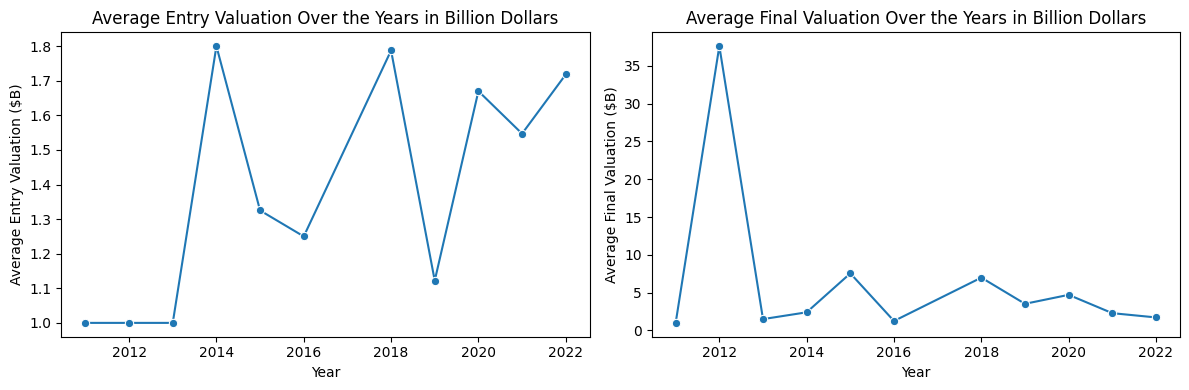

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

average_entry_valuation = df.groupby('Year')['Entry_Valuation ($B)'].mean().reset_index()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data=average_entry_valuation, x='Year', y='Entry_Valuation ($B)', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Entry Valuation ($B)')
plt.title('Average Entry Valuation Over the Years in Billion Dollars')

# Line plot: Average final valuation over the years
average_final_valuation = df.groupby('Year')['Final_Valuation ($B)'].mean().reset_index()
plt.subplot(1, 2, 2)
sns.lineplot(data=average_final_valuation, x='Year', y='Final_Valuation ($B)', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Final Valuation ($B)')
plt.title('Average Final Valuation Over the Years in Billion Dollars')

plt.tight_layout()
plt.show()

### Insights
1. Peaks in Entry Evaluation: In the years 2014, 2018, 2021, and 2022, there were prominent peaks in the average entry evaluations. During these years, the average entry evaluation reached approximately 1.8 billion dollars.

2. Decrease in Other Years: In contrast, the average entry evaluations in the remaining years showed a noticeable drop compared to the peak years. This indicates a general trend of lower valuations during those periods.

3. Final valuation also very high in 2012 but after that it shows gradual decrease in next years, but that was an outlier , but we can say Final valuation is steady and constant around 0- 5 billion dollars

In [14]:
#Analyse the profit based on Entry and Final Valuation.
df['Profit'] = ((df['Final_Valuation ($B)'] - df['Entry_Valuation ($B)']))

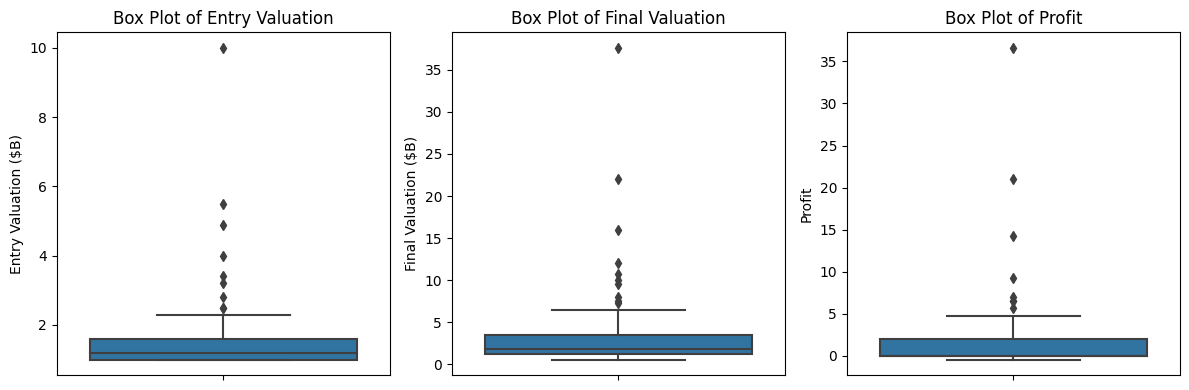

In [15]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Box plot for entry valuation
sns.boxplot(data=df, y='Entry_Valuation ($B)', ax=axes[0])
axes[0].set_ylabel('Entry Valuation ($B)')
axes[0].set_title('Box Plot of Entry Valuation')

# Box plot for final valuation
sns.boxplot(data=df, y='Final_Valuation ($B)', ax=axes[1])
axes[1].set_ylabel('Final Valuation ($B)')
axes[1].set_title('Box Plot of Final Valuation')

# Box plot for profit
sns.boxplot(data=df, y='Profit', ax=axes[2])
axes[2].set_ylabel('Profit')
axes[2].set_title('Box Plot of Profit')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

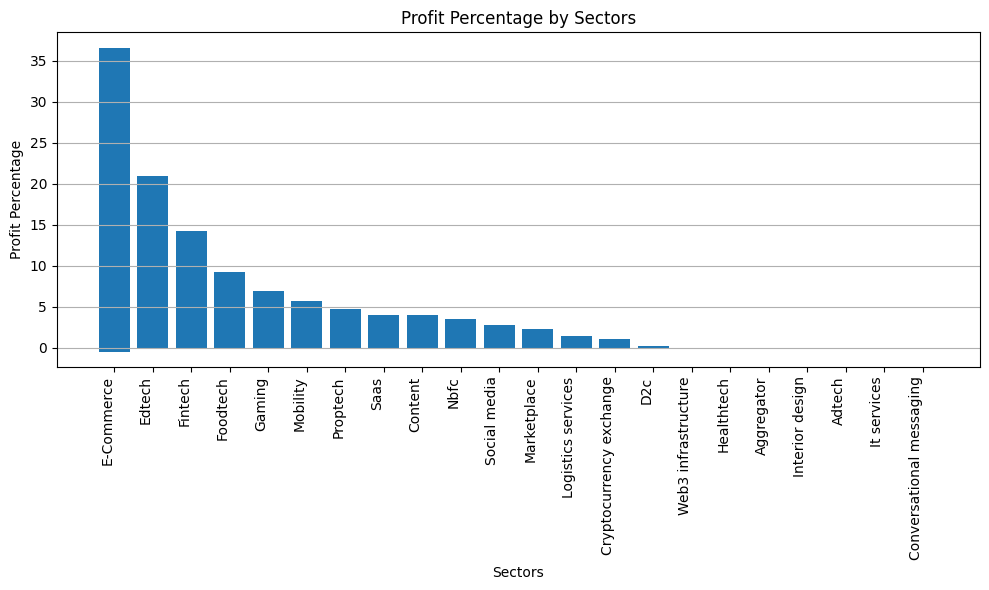

In [24]:
def plot_profit_percentage_by_sectors(sectors, profit_percentages):
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the bar graph
    ax.bar(sectors, profit_percentages)
    
    # Customize the plot
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Profit Percentage')
    ax.set_title('Profit Percentage by Sectors')
    ax.grid(axis='y')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Assuming you have a DataFrame df with 'Main_Sector' and 'Profit' columns
df_sorted = df.sort_values(by='Profit', ascending=False)

# Call the function with the sorted DataFrame
plot_profit_percentage_by_sectors(df_sorted['Main_Sector'], df_sorted['Profit'])


**We can observe many outliers are there in the dataset, fow now ignore the outliers.**

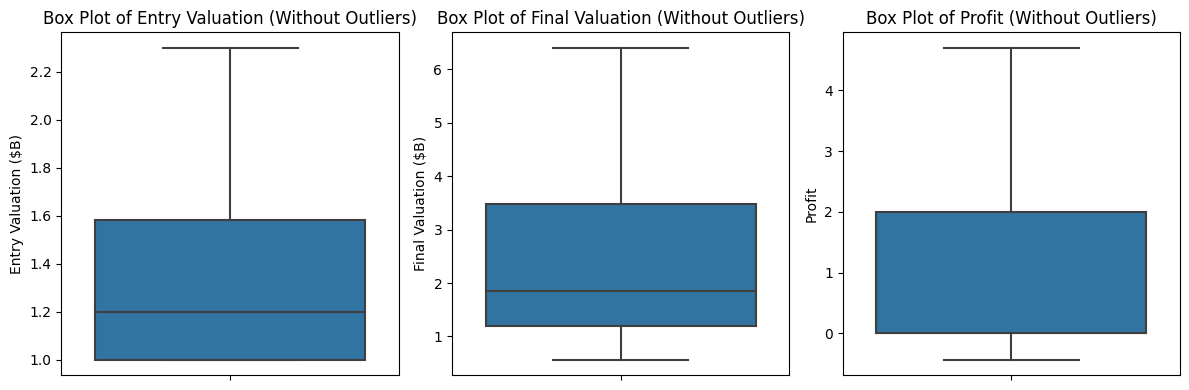

In [16]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Box plot for entry valuation without outliers
sns.boxplot(data=df, y='Entry_Valuation ($B)', ax=axes[0], showfliers=False)
axes[0].set_ylabel('Entry Valuation ($B)')
axes[0].set_title('Box Plot of Entry Valuation (Without Outliers)')

# Box plot for final valuation without outliers
sns.boxplot(data=df, y='Final_Valuation ($B)', ax=axes[1], showfliers=False)
axes[1].set_ylabel('Final Valuation ($B)')
axes[1].set_title('Box Plot of Final Valuation (Without Outliers)')

# Box plot for profit without outliers
sns.boxplot(data=df, y='Profit', ax=axes[2], showfliers=False)
axes[2].set_ylabel('Profit')
axes[2].set_title('Box Plot of Profit (Without Outliers)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

## Insights
- The average entry valuation of the startups is 1.2 billion dollars, with a maximum entry valuation of 2.2 billion dollars.
- The average final valuation of the startups is around 1.8 billion dollars, with a maximum final valuation around 6 billion dollars.
- The average profit made by the startups is 1.49 billion dollars, with a minimum profit of -0.43 billion dollars and a maximum profit around 4 billion dollars.

In [17]:
df.to_csv('Data/PreprocessedUnicorn.csv', index=False)

---
## Summary of Insights:
---
1. Main Sectors: 
   - Fintech emerges as the leading sector for unicorn startups, followed by SaaS and E-Commerce.
   - Fintech, SaaS, and E-Commerce collectively dominate the unicorn startup landscape.
   - Other notable sectors include Marketplace, Edtech, and Logistics Services.

2. Entry Valuation: 
   - Web3 Infrastructure sector has the highest average entry valuation requirement, indicating substantial investment and growth potential.
   - Other sectors like E-Commerce, Fintech, Healthtech, and Edtech have relatively lower average entry valuations.

3. Total Investors: 
   - Bangalore has the highest concentration of unicorn startups, followed by Gurgaon and Mumbai.
   - Other locations like Delhi, Pune, and Noida also have notable unicorn startup presence.

4. Profitability: 
   - Foodtech, Mobility, Edtech, and Content sectors have shown the highest profit percentages.
   - Fintech and Gaming sectors have also demonstrated considerable profitability.

5. Year-wise Analysis: 
   - 2021 witnessed a remarkable surge in unicorn startup establishments.
   - In 2022, the number of startups remained high but slightly decreased compared to 2021.
   - Years 2018, 2019, and 2020 also showed a healthy startup environment.

6. Investor Trends: 
   - The number of investors experienced rapid growth in 2021 but declined in 2022.

7. Location Hubs: 
   - Bangalore and Gurgaon emerge as primary startup hubs, followed by Mumbai, Pune, Chennai, and Delhi.

8. Entry Evaluation: 
   - Prominent peaks in average entry evaluations were observed in 2014, 2018, 2021, and 2022.
   - Other years showed a noticeable drop in average entry evaluations.
 ---
In Further analysis and exploration can be done within each sector, location, or specific year to gain more in-depth insights and inform decision-making processes.

## Until then Keep coding and stay curious! 🚀 